In [20]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
conda install --yes -c conda-forget jupyter_conrib_nbextensions
jupyter nbextension enable toc/main

SyntaxError: invalid syntax (3280561479.py, line 1)

In [3]:
jupyter nbextension enable toc2/main

SyntaxError: invalid syntax (992194340.py, line 1)

In [4]:
df = pd.read_csv('ds_salaries.csv')

NameError: name 'pd' is not defined

# изучение

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   job_title           607 non-null    object  
 1   work_year           607 non-null    category
 2   experience_level    607 non-null    object  
 3   employment_type     607 non-null    object  
 4   salary_in_usd       607 non-null    int64   
 5   employee_residence  607 non-null    object  
 6   company_location    607 non-null    object  
 7   company_size        607 non-null    object  
dtypes: category(1), int64(1), object(6)
memory usage: 34.0+ KB


In [23]:
df.head(10)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [24]:
df.sample(10)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
42,42,2020,MI,FT,Machine Learning Infrastructure Engineer,44000,EUR,50180,PT,0,PT,M
86,86,2021,EN,FT,Data Analyst,50000,EUR,59102,FR,50,FR,M
78,78,2021,MI,CT,ML Engineer,270000,USD,270000,US,100,US,L
434,434,2022,MI,FT,Data Engineer,80000,GBP,104702,GB,100,GB,M
332,332,2022,SE,FT,Data Analyst,112900,USD,112900,US,100,US,M
351,351,2022,SE,FT,Data Science Manager,137141,USD,137141,US,100,US,M
145,145,2021,SE,FT,Machine Learning Engineer,70000,EUR,82744,BE,50,BE,M
486,486,2022,SE,FT,Data Scientist,230000,USD,230000,US,100,US,M
245,245,2021,MI,FT,Data Engineer,52500,GBP,72212,GB,50,GB,L
509,509,2022,MI,FT,Applied Data Scientist,157000,USD,157000,US,100,US,L


# обработка null

In [25]:
df.isna().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [32]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

job_title - 0%
work_year - 0%
experience_level - 0%
employment_type - 0%
salary_in_usd - 0%
employee_residence - 0%
company_location - 0%
company_size - 0%


In [150]:
df.nunique()

job_title              50
work_year               3
experience_level        4
employment_type         4
salary_in_usd         369
employee_residence     57
company_location       50
company_size            3
dtype: int64

# Настойка таблицы

In [26]:
df = df.drop(df.columns[[0,5,6,9]], axis=1)

In [30]:
df = df[['job_title'] + [col for col in df.columns if col != 'job_title' ]]
df

,job_title,work_year,experience_level,employment_type,salary_in_usd,employee_residence,company_location,company_size
0,Data Scientist,2020,MI,FT,79833,DE,DE,L
1,Machine Learning Scientist,2020,SE,FT,260000,JP,JP,S
2,Big Data Engineer,2020,SE,FT,109024,GB,GB,M
3,Product Data Analyst,2020,MI,FT,20000,HN,HN,S
4,Machine Learning Engineer,2020,SE,FT,150000,US,US,L
...,...,...,...,...,...,...,...,...
602,Data Engineer,2022,SE,FT,154000,US,US,M
603,Data Engineer,2022,SE,FT,126000,US,US,M
604,Data Analyst,2022,SE,FT,129000,US,US,M
605,Data Analyst,2022,SE,FT,150000,US,US,M


In [37]:
df['work_year'].unique()

array([2020, 2021, 2022], dtype=int64)

In [38]:
df['work_year'] = df['work_year'].astype('category')

# исследование

<AxesSubplot:ylabel='Count'>

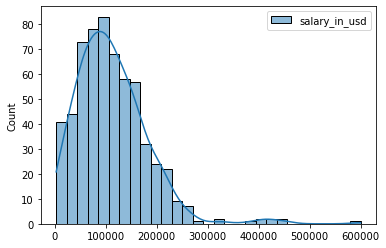

In [42]:
sns.histplot(df,kde=True)

In [66]:
w  = df.pivot_table(values = 'salary_in_usd', index=['job_title', 'experience_level'], aggfunc=[len, np.mean], fill_value=0, dropna=False).sort_values(by = ('mean', 'salary_in_usd') , ascending=True)
w[w[('len', 'salary_in_usd')] > 3]

,,len,mean
,,salary_in_usd,salary_in_usd
job_title,experience_level,,
AI Scientist,EN,4,21987.250000
Data Analyst,EN,12,53960.666667
Data Scientist,EN,22,55330.909091
Data Engineer,EN,12,58933.500000
Data Science Consultant,EN,5,62640.800000
Data Analyst,MI,29,71699.206897
Machine Learning Engineer,MI,12,74466.583333
Data Scientist,MI,60,82039.133333


In [73]:
e = df.pivot_table(values = 'salary_in_usd', index=['employment_type'], aggfunc=[len, np.mean], fill_value=0, dropna=False).sort_values(by = ('mean', 'salary_in_usd') , ascending=True)
e

,len,mean
,salary_in_usd,salary_in_usd
employment_type,,
PT,10,33070.500000
FL,4,48000.000000
FT,588,113468.073129
CT,5,184575.000000


In [78]:
e.loc['FT'] - e.loc['PT']

len   salary_in_usd      578.000000
mean  salary_in_usd    80397.573129
dtype: float64

In [149]:
df.groupby('employee_residence').filter(lambda s: s.employee_residence.count()<5)['employee_residence'] = 

3      HN
7      HU
9      NZ
17     PL
20     CN
       ..
507    AT
510    AU
513    IE
515     1
518    CH
Name: employee_residence, Length: 71, dtype: object

In [114]:
df['employee_residence'] != 'RU'

0      True
1      True
2      True
3      True
4      True
       ... 
602    True
603    True
604    True
605    True
606    True
Name: employee_residence, Length: 607, dtype: bool

In [113]:
df.groupby('employee_residence').filter(lambda s: s.employee_residence.count()<5)

,job_title,work_year,experience_level,employment_type,salary_in_usd,employee_residence,company_location,company_size
3,Product Data Analyst,2020,MI,FT,20000,HN,HN,S
7,Data Scientist,2020,MI,FT,35735,HU,HU,L
9,Lead Data Engineer,2020,SE,FT,125000,NZ,NZ,S
17,Big Data Engineer,2020,SE,FT,114047,PL,GB,S
20,Machine Learning Engineer,2020,MI,FT,43331,CN,CN,M
...,...,...,...,...,...,...,...,...
507,Research Scientist,2022,MI,FT,64849,AT,AT,L
510,Computer Vision Software Engineer,2022,EN,FT,150000,AU,AU,S
513,Machine Learning Engineer,2022,SE,FT,71444,IE,IE,S
515,Data Scientist,2022,MI,FT,48000,1,US,S


In [118]:
df.pivot_table(values = 'salary_in_usd', index=['employee_residence'], aggfunc=[len, np.mean], fill_value=0, dropna=False).sort_values(by = ('mean', 'salary_in_usd') , ascending=True)

,len,mean
,salary_in_usd,salary_in_usd
employee_residence,,
IR,1,4000.000000
KE,1,9272.000000
UA,1,13400.000000
MD,1,18000.000000
MX,2,18185.000000
HN,1,20000.000000
TR,3,20096.666667
CO,1,21844.000000
